In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = r"C:\Users\lokesh\Documents\lokesh DA Folder\Datasets\Netflix TV Shows and Movies.csv"

In [4]:
raw = pd.read_csv(path)

In [5]:
ntfx = raw.copy()

##  # EDA

In [6]:
display(ntfx.head())
display(ntfx.tail())

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0
5282,5282,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,0,tt13711094,8.8,16.0


In [7]:
ntfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


## # DATA CLEANING

In [8]:
ntfx.isnull().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [9]:
ntfx.columns

Index(['index', 'id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

In [10]:
# ntfx.drop("description", axis=1, inplace=True)
ntfx.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [11]:
ntfx['imdb_score'] = ntfx['imdb_score'].round(1)

In [12]:
ntfx['imdb_votes'].fillna(1)

0       795222.0
1       530877.0
2       392419.0
3       391942.0
4        72895.0
          ...   
5278        26.0
5279        39.0
5280        32.0
5281         9.0
5282        16.0
Name: imdb_votes, Length: 5283, dtype: float64

In [125]:
ntfx.isnull().sum()

index           0
id              0
title           0
type            0
description     4
release_year    0
runtime         0
imdb_id         0
imdb_score      0
imdb_votes      0
dtype: int64

In [108]:
ntfx["imdb_votes"].nsmallest(10)

822     5.0
2752    5.0
4110    5.0
5186    5.0
91      6.0
399     6.0
1137    6.0
1168    6.0
2077    6.0
4175    6.0
Name: imdb_votes, dtype: float64

In [16]:
# delete all the empty row in imdb_votes column
ntfx = ntfx.dropna(subset=["imdb_votes"])

In [17]:
# delete age certification column too
ntfx.drop("age_certification", axis=1, inplace=True)

In [18]:
# Now our data looks clean. We can start analyzing it
ntfx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5267 entries, 0 to 5282
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         5267 non-null   int64  
 1   id            5267 non-null   object 
 2   title         5267 non-null   object 
 3   type          5267 non-null   object 
 4   description   5263 non-null   object 
 5   release_year  5267 non-null   int64  
 6   runtime       5267 non-null   int64  
 7   imdb_id       5267 non-null   object 
 8   imdb_score    5267 non-null   float64
 9   imdb_votes    5267 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 452.6+ KB


In [19]:
ntfx.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5267.000000,5267.000000,5267.000000,5267.000000,5.267000e+03
mean,2637.049364,2015.869375,79.308335,6.533264,2.340719e+04
std,1524.200968,7.353379,38.886352,1.161348,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1318.500000,2015.000000,46.000000,5.800000,5.210000e+02
50%,2635.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3955.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


### 1) Display counts of Shows over Movies

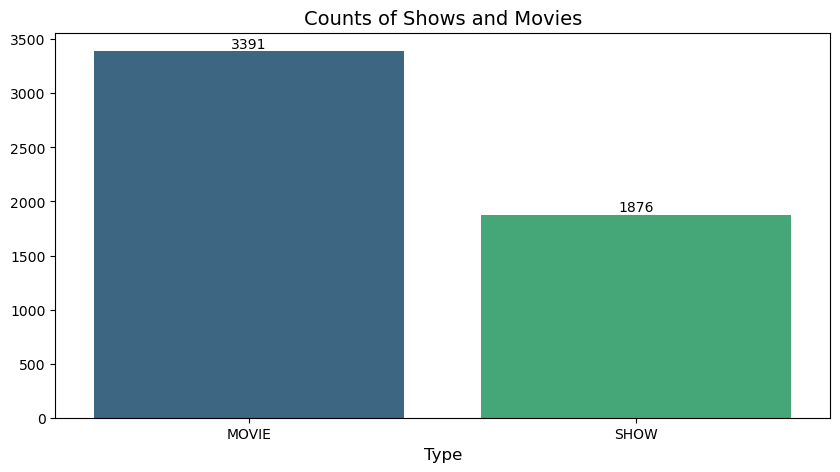

In [21]:
plt.figure(figsize=(10,5))
ax = sns.countplot(ntfx, x="type", hue="type", palette="viridis" )
for p in ax.patches:
    ax.text(                               # Labelling part {
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        int(p.get_height()),
        ha="center", va="bottom"          # } Labelling Part
    )
ax.set_title("Counts of Shows and Movies", fontsize=14)
ax.set_xlabel("Type", fontsize=12)
ax.set_ylabel("")
# ax.Dodge()
plt.show()

In [22]:
# Dataset Only for Shows
shows = ntfx[ntfx["type"] == "SHOW"]
shows.shape

(1876, 10)

In [136]:
# Dataset Only for Movies
movies = ntfx[ntfx["type"] == "MOVIE"]
movies.shape

(3391, 10)

### 2) How many movies releases each year?

In [24]:
ryt = ntfx.groupby("release_year")["title"].count()
ryt = ryt.reset_index().nlargest(15,"title")

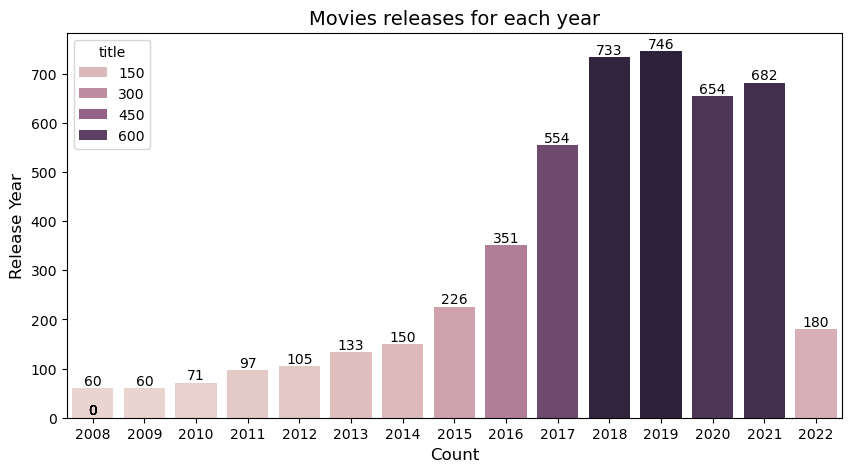

In [138]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=ryt, x="release_year", y="title", hue="title")
                                             # labeling part{
for p in ax.patches:                       
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        int(p.get_height()),
        ha="center", va="bottom"
    )
                                            # }labeling part
ax.set_title("Movies releases for each year", fontsize=14)
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Release Year", fontsize=12)
plt.show()

###  3) Average runtime of Movies in the dataset

In [26]:
ntfx['runtime'].mean()

79.30833491551168

### 4) What was the average runtime of movies in 19th century?

In [158]:
_19th = ntfx[ntfx["release_year"] < 2000]
print(f"Average runtime of Movies in 19th Century is {_19th['runtime'].mean().round(2)} minutes")

Average runtime of Movies in 19th Century is 107.6 minutes


### 5) What is the average runtime of movies in 20th century?

In [164]:
# what is the average runtime of movies in 20th century
_20th = ntfx[ntfx["release_year"] > 2000]
print(f"Average runtime of Movies in 20th Century is {_20th['runtime'].mean().round(2)} minutes")

Average runtime of Movies in 20th Century is 78.07 minutes


###  6) Top 10 movies with highest IMDB Score

In [168]:
ttm = movies[["imdb_score","title"]].nlargest(10,"imdb_score")
ttm.reset_index()

,index,imdb_score,title
0,24,9.0,No Longer Kids
1,822,9.0,Chhota Bheem & Krishna in Mayanagari
2,2685,9.0,C/o Kancharapalem
3,3172,9.0,David Attenborough: A Life on Our Planet
4,101,8.8,Forrest Gump
5,246,8.8,Inception
6,4143,8.8,Sky Tour: The Movie
7,81,8.7,Bye Bye London
8,495,8.7,A Lion in the House
9,566,8.7,Anbe Sivam


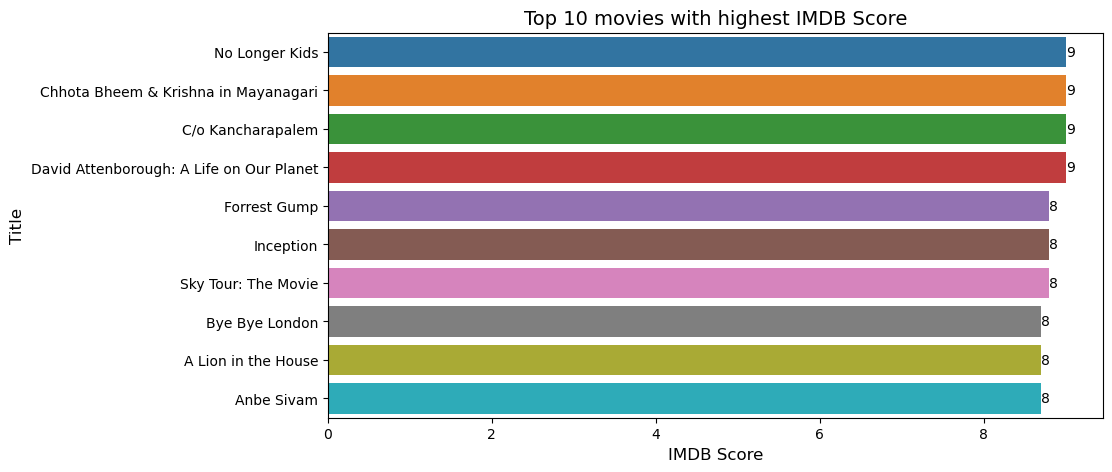

In [30]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=ttm, x="imdb_score", y="title", hue="title", palette="tab10")
for p in ax.patches:
    ax.text(
        p.get_width(),
        p.get_y() + p.get_height() / 2,
        int(p.get_width()),
        ha="left", va="center"
    )
    # ValueError: 'right' is not a valid value for Vertical align; supported values are 'top', 'bottom', 'center', 'baseline', 'center_baseline'
    # ValueError: 'top' is not a valid value for horizontal align; supported values are 'center', 'right', 'left'
ax.set_title("Top 10 movies with highest IMDB Score", fontsize=14)
ax.set_xlabel("IMDB Score", fontsize=12)
ax.set_ylabel("Title", fontsize=12)
plt.show()

###  7) Top 10 shows with highest IMDB Score

In [31]:
tts = shows[["imdb_score","title"]].nlargest(10,"imdb_score")
tts

,imdb_score,title
622,9.6,Khawatir
2787,9.6,#ABtalks
229,9.5,Breaking Bad
245,9.3,Avatar: The Last Airbender
3144,9.3,Our Planet
3597,9.3,Kota Factory
1346,9.2,Reply 1988
1953,9.2,My Mister
4628,9.2,Who Rules The World
3026,9.1,The Last Dance


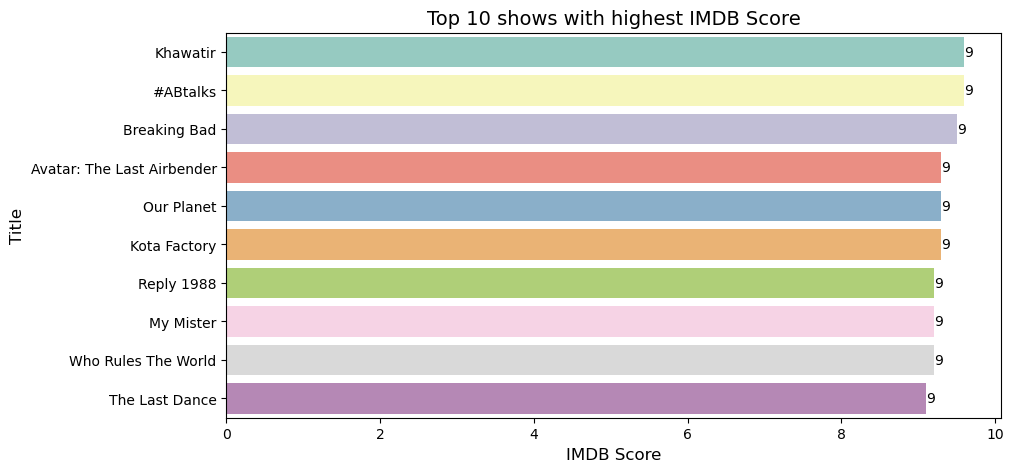

In [32]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=tts, x="imdb_score", y="title", palette ="Set3", legend=False)
for p in ax.patches :
    ax.text(
    p.get_width(),
    p.get_y() + p.get_height() / 2,
    int(p.get_width()),
    ha="left", va="center"
)
ax.set_title("Top 10 shows with highest IMDB Score", fontsize=14)
ax.set_xlabel("IMDB Score", fontsize=12)
ax.set_ylabel("Title", fontsize=12)
plt.show()

###  8) Total percentage of votes for movies and shows

In [33]:
# sum of votes for movies and shows
votes = ntfx.groupby("type")["imdb_votes"].sum()
votes

type
MOVIE    90482789.0
SHOW     32802907.0
Name: imdb_votes, dtype: float64

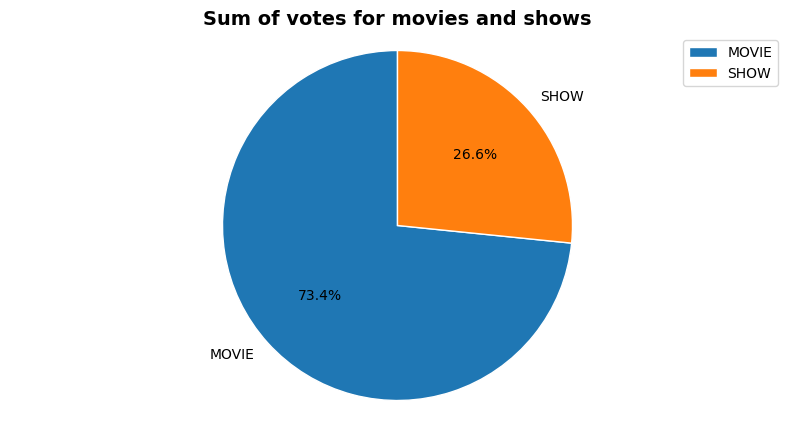

In [34]:
labelv=["MOVIE","SHOW"]

plt.figure(figsize=(10,5))
plt.pie(votes, labels=labelv, autopct='%1.1f%%', startangle=90, wedgeprops={"edgecolor":"white"})
plt.title("Sum of votes for movies and shows", fontsize=14, fontweight='bold')
plt.axis('equal')
plt.legend()
plt.show()

###  9) Top 10 Movies with highest IMDB Votes

In [175]:
tmv = movies[["imdb_votes","title"]].nlargest(10,"imdb_votes")
tmv.reset_index()

,index,imdb_votes,title
0,246,2268288.0,Inception
1,101,1994599.0,Forrest Gump
2,662,1472668.0,Django Unchained
3,104,1346020.0,Saving Private Ryan
4,0,795222.0,Taxi Driver
5,870,748654.0,The Imitation Game
6,48,723306.0,Full Metal Jacket
7,248,719717.0,How to Train Your Dragon
8,683,697481.0,Silver Linings Playbook
9,262,681286.0,The Social Network


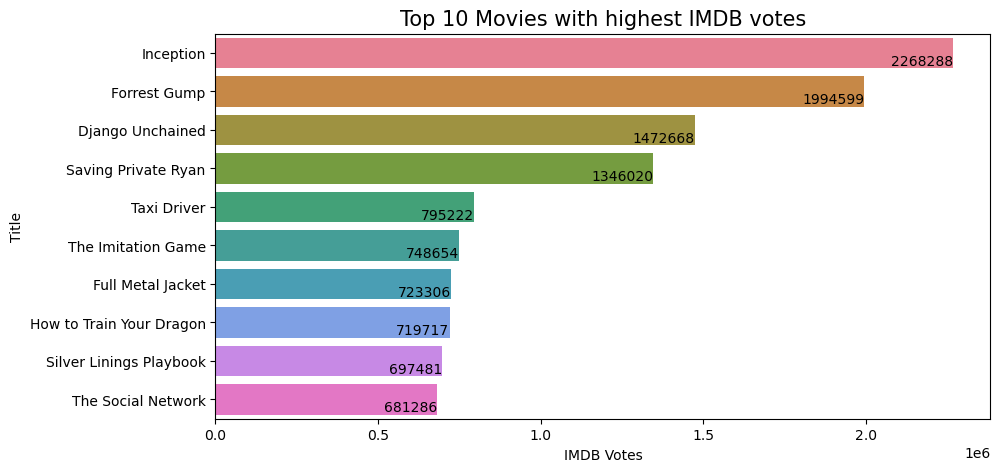

In [36]:
plt.figure(figsize=(10,5))
ax = sns.barplot(tmv, x="imdb_votes", y="title", hue="title", palette="husl")
for p in ax.patches:
    ax.text(
        p.get_width(),
        p.get_y() + p.get_height(),
        int(p.get_width()),
        ha="right", va="bottom"
            )
ax.set_xlabel("IMDB Votes")
ax.set_ylabel("Title")
ax.set_title("Top 10 Movies with highest IMDB votes", fontsize=15, fontweight="medium")
plt.show()

###  10) Top 10 shows with highest IMDB Votes

In [37]:
tsv = shows[["imdb_votes","title"]].nlargest(10,"imdb_votes")
tsv

,imdb_votes,title
229,1727694.0,Breaking Bad
1145,989090.0,Stranger Things
230,945125.0,The Walking Dead
660,515577.0,Black Mirror
883,494092.0,House of Cards
859,485506.0,Peaky Blinders
3016,465949.0,The Witcher
1740,450797.0,Money Heist
239,428639.0,Supernatural
675,425716.0,Arrow


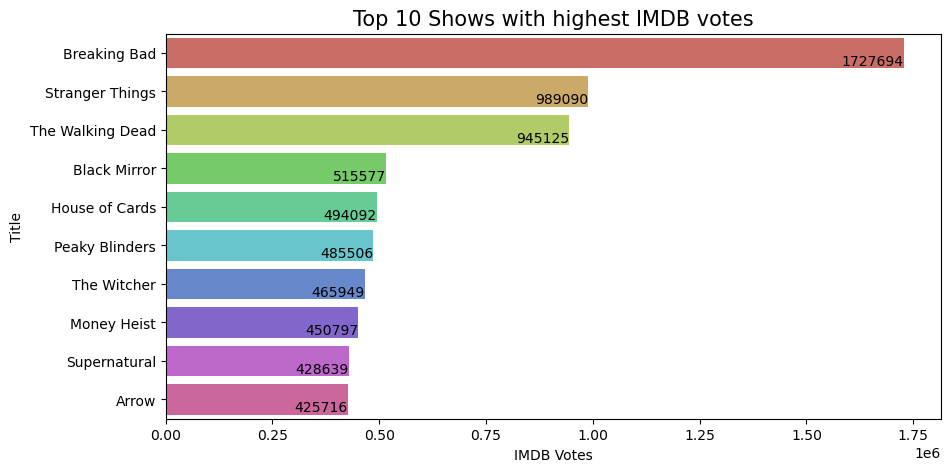

In [38]:
plt.figure(figsize=(10,5))
ax = sns.barplot(tsv, x="imdb_votes", y="title", hue="title", palette="hls")
for p in ax.patches:
    ax.text(
        p.get_width(),
        p.get_y() + p.get_height(),
        int(p.get_width()),
        ha="right", va="bottom"
            )
ax.set_xlabel("IMDB Votes")
ax.set_ylabel("Title")
ax.set_title("Top 10 Shows with highest IMDB votes", fontsize=15, fontweight="medium")
plt.show()

###  12) Correlation of the dataset

In [39]:
corr =ntfx.describe().corr()
corr

,index,release_year,runtime,imdb_score,imdb_votes
index,1.000000,0.562558,0.548993,0.519733,0.516727
release_year,0.562558,1.000000,0.877724,0.873507,-0.062608
runtime,0.548993,0.877724,1.000000,0.999329,-0.116308
imdb_score,0.519733,0.873507,0.999329,1.000000,-0.148563
imdb_votes,0.516727,-0.062608,-0.116308,-0.148563,1.000000


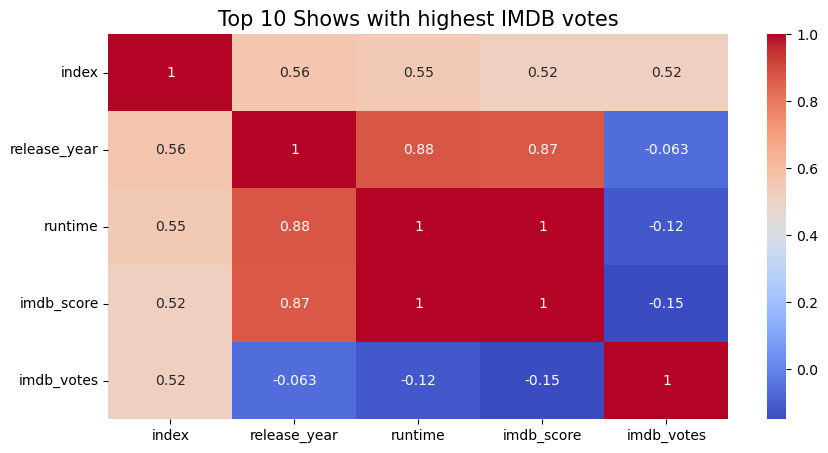

In [191]:
plt.figure(figsize=(10,5))
ax = sns.heatmap(corr, cmap="coolwarm", annot=True)
ax.set_title("Top 10 Shows with highest IMDB votes", fontsize=15, fontweight="medium")
plt.show()

#### As shown in the heatmap that column runtime, release_year, imdb_score have good relations with each other,
#### While imdb score is closely related to runtime and release_year column, although they both have bad relations with each other.